# Machine Learning on gut microbiota of patients with Colorectal cancer (7): Optimizing the SVM Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this notebook, I aim to tune parameters of the SVM Classification model using scikit-learn. 

## Loading libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd 
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

## Importing data

In [2]:
'''
# raw data
data_df = pd.read_table('./dataset/MergeData.tsv', sep="\t", index_col=0)
data = data_df.reset_index(drop=True)
data.head()

# CLR-transformed data
data_df = pd.read_table('./dataset/MergeData_clr.tsv', sep="\t", index_col=0)
data = data_df.reset_index(drop=True)
data.head()
'''

# significant species
data_df = pd.read_table('./dataset/MergeData_clr_signif.tsv', sep="\t", index_col=0)
data = data_df.reset_index(drop=True)
data.head()

,disease,s__Parvimonas_micra,s__Roseburia_faecis,s__Collinsella_aerofaciens,s__Actinomyces_sp_HMSC035G02,s__Roseburia_intestinalis,s__Bacteroides_plebeius,s__Faecalibacterium_prausnitzii,s__Eubacterium_eligens,s__Ruminococcus_bicirculans,...,s__Bacteroides_caccae,s__Alistipes_shahii,s__Fusobacterium_mortiferum,s__Bacteroides_dorei,s__Bifidobacterium_pseudocatenulatum,s__Blautia_wexlerae,s__Haemophilus_parainfluenzae,s__Turicimonas_muris,s__Gemella_haemolysans,s__Bifidobacterium_longum
0,healthy,-3.441779,-3.441779,6.576766,-3.441779,-3.441779,10.262146,7.729839,7.605931,-3.441779,...,-3.441779,0.667517,-3.441779,8.532694,-3.441779,6.386041,4.686443,-3.441779,-3.441779,6.717971
1,healthy,-3.929140,5.691656,4.532923,-3.929140,6.393962,7.609333,6.654823,4.236672,4.372945,...,3.844374,1.704619,-3.929140,4.466872,3.229868,2.122180,2.479674,-3.929140,-3.929140,4.429797
2,healthy,-0.407520,7.383588,-3.379905,1.248080,3.614452,8.411267,7.668467,-3.379905,5.890776,...,5.935044,3.038147,-3.379905,7.884081,-3.379905,7.163770,2.015644,-3.379905,2.332939,-3.379905
3,healthy,-3.632294,5.307481,5.897842,-3.632294,3.636733,6.261269,5.819509,4.064784,-3.632294,...,-3.632294,3.401043,3.295942,6.939669,1.234944,3.370701,-3.632294,-3.632294,-3.632294,3.089479
4,CRC,2.320322,-5.007660,4.759592,-1.450665,-5.007660,-0.026692,3.808831,4.253082,2.034727,...,-5.007660,5.167885,-5.007660,5.697435,1.727297,2.949174,2.203556,-5.007660,0.273296,3.893588


## Build a predictive model and evaluate with 5-cross validation using support vector classifies



The classifier accuracy score is 0.60

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        78
           1       0.57      0.70      0.63        74

    accuracy                           0.60       152
   macro avg       0.61      0.60      0.60       152
weighted avg       0.61      0.60      0.59       152



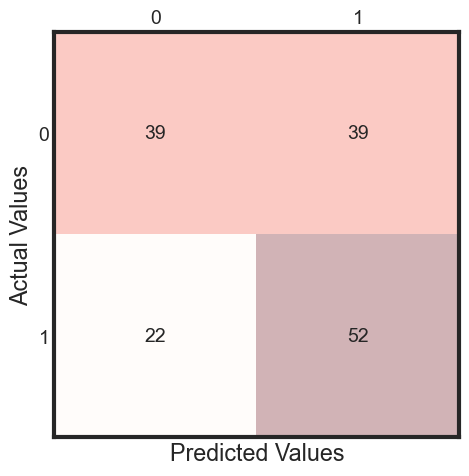

In [3]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:, 1:data.shape[1]]
y = array[:, 0]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=3)

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
#print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

## Importance of optimizing a classifier

We can tune two key parameters of the SVM algorithm:
* the value of C (how much to relax the margin) 
* and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:
 * Grid Search Parameter Tuning. 
 * Random Search Parameter Tuning.

In [4]:
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [5]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.69


In [6]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        78
           1       0.60      0.70      0.65        74

    accuracy                           0.62       152
   macro avg       0.63      0.63      0.62       152
weighted avg       0.63      0.62      0.62       152



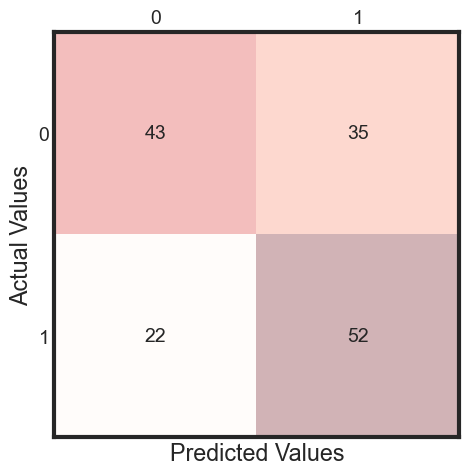

In [7]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()


## Decision boundaries of different classifiers

Let's see the decision boundaries produced by the linear, Gaussian and polynomial classifiers.

* *s__Parvimonas_micra*
* *s__Roseburia_faecis*

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features (s__Parvimonas_micra, s__Roseburia_faecis).

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'

# create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

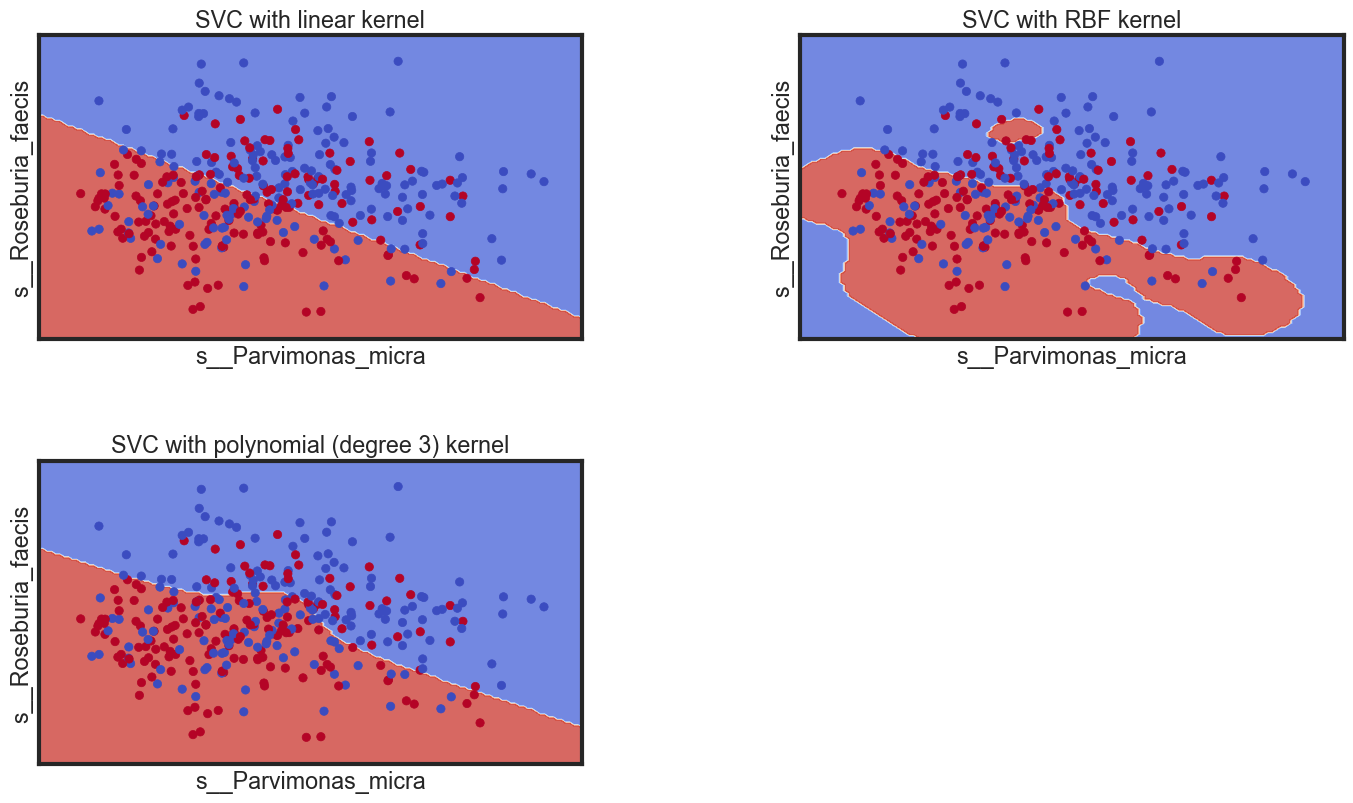

In [10]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('s__Parvimonas_micra')
    plt.ylabel('s__Roseburia_faecis')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Conclusion

This work demonstrates the modelling of CRC as classification task using Support Vector Machine 

The SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

Next Task:
1. Summary and conclusion of findings
2. Compare with other classification methods
   * Decision trees with tree.DecisionTreeClassifier();
   * K-nearest neighbors with neighbors.KNeighborsClassifier();
   * Random forests with ensemble.RandomForestClassifier();
   * Perceptron (both gradient and stochastic gradient) with mlxtend.classifier.Perceptron; and
   * Multilayer perceptron network (both gradient and stochastic gradient) with mlxtend.classifier.MultiLayerPerceptron.
    

## Reference

* [Breast-cancer-risk-prediction](https://github.com/Jean-njoroge/Breast-cancer-risk-prediction)